In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import wrangle as wr

In [2]:
# train = df[:'2017']
# test = df['2018':]

# Acquiring Data:

In [3]:
df = wr.get_combined_df()

In [4]:
df.head(2)

,ercot_load,dow,is_weekday,is_obs_holiday,hs_temp,hs_feelslike,hs_dew,hs_humidity,hs_precip,hs_windgust,...,vc_precip,vc_windgust,vc_windspeed,vc_winddir,vc_sealevelpressure,vc_cloudcover,vc_visibility,vc_solarradiation,vc_solarenergy,vc_uvindex
datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00-06:00,7931.241900,Friday,1,1,47.3,41.2,43.2,85.37,0.0,27.5,...,0.0,24.2,16.1,360.0,1027.7,98.7,9.9,0.0,NaN,0
2010-01-01 01:00:00-06:00,7775.456846,Friday,1,1,46.8,39.9,41.4,81.38,0.0,24.2,...,0.0,26.5,15.1,350.0,1028.1,98.6,9.9,0.0,NaN,0


In [5]:
df.index

DatetimeIndex(['2010-01-01 00:00:00-06:00', '2010-01-01 01:00:00-06:00',
               '2010-01-01 02:00:00-06:00', '2010-01-01 03:00:00-06:00',
               '2010-01-01 04:00:00-06:00', '2010-01-01 05:00:00-06:00',
               '2010-01-01 06:00:00-06:00', '2010-01-01 07:00:00-06:00',
               '2010-01-01 08:00:00-06:00', '2010-01-01 09:00:00-06:00',
               ...
               '2022-06-30 14:00:00-05:00', '2022-06-30 15:00:00-05:00',
               '2022-06-30 16:00:00-05:00', '2022-06-30 17:00:00-05:00',
               '2022-06-30 18:00:00-05:00', '2022-06-30 19:00:00-05:00',
               '2022-06-30 20:00:00-05:00', '2022-06-30 21:00:00-05:00',
               '2022-06-30 22:00:00-05:00', '2022-06-30 23:00:00-05:00'],
              dtype='datetime64[ns, US/Central]', name='datetime', length=109535, freq=None)

## Splitting Data:

In [6]:
train = df[:'2017']
test = df['2018':]

In [7]:
train.shape[0]

70128

# Exploring the Data:

In [8]:
sns.set_palette('CMRmap')

## Key Questions:
- What does seasonality look like over time?
    - It is expected that there will be seasonal trends for years. Visualize it.
    - Are there larger seasonal trends, such as multi-year cycles?
- Has there been a significant upward trend in temperatures over the years?
    - Are there other trends that may or may not be related to this (e.g. less precipitation, more wind, etc.)?

### Columnns:

In [9]:
train.columns

Index(['ercot_load', 'dow', 'is_weekday', 'is_obs_holiday', 'hs_temp',
       'hs_feelslike', 'hs_dew', 'hs_humidity', 'hs_precip', 'hs_windgust',
       'hs_windspeed', 'hs_winddir', 'hs_sealevelpressure', 'hs_cloudcover',
       'hs_visibility', 'hs_solarradiation', 'hs_solarenergy', 'hs_uvindex',
       'gv_temp', 'gv_feelslike', 'gv_dew', 'gv_humidity', 'gv_precip',
       'gv_windgust', 'gv_windspeed', 'gv_winddir', 'gv_sealevelpressure',
       'gv_cloudcover', 'gv_visibility', 'gv_solarradiation', 'gv_solarenergy',
       'gv_uvindex', 'pl_temp', 'pl_feelslike', 'pl_dew', 'pl_humidity',
       'pl_precip', 'pl_windgust', 'pl_windspeed', 'pl_winddir',
       'pl_sealevelpressure', 'pl_cloudcover', 'pl_visibility',
       'pl_solarradiation', 'pl_solarenergy', 'pl_uvindex', 'vc_temp',
       'vc_feelslike', 'vc_dew', 'vc_humidity', 'vc_precip', 'vc_windgust',
       'vc_windspeed', 'vc_winddir', 'vc_sealevelpressure', 'vc_cloudcover',
       'vc_visibility', 'vc_solarradiation', '

### Seasonality:

#### Temperatures:

In [10]:
#Creating a "mean_temp" column to average the temperaturs across the cities:

train['mean_temp'] = (train.hs_temp + train.gv_temp + train.pl_temp + train.vc_temp) / 4

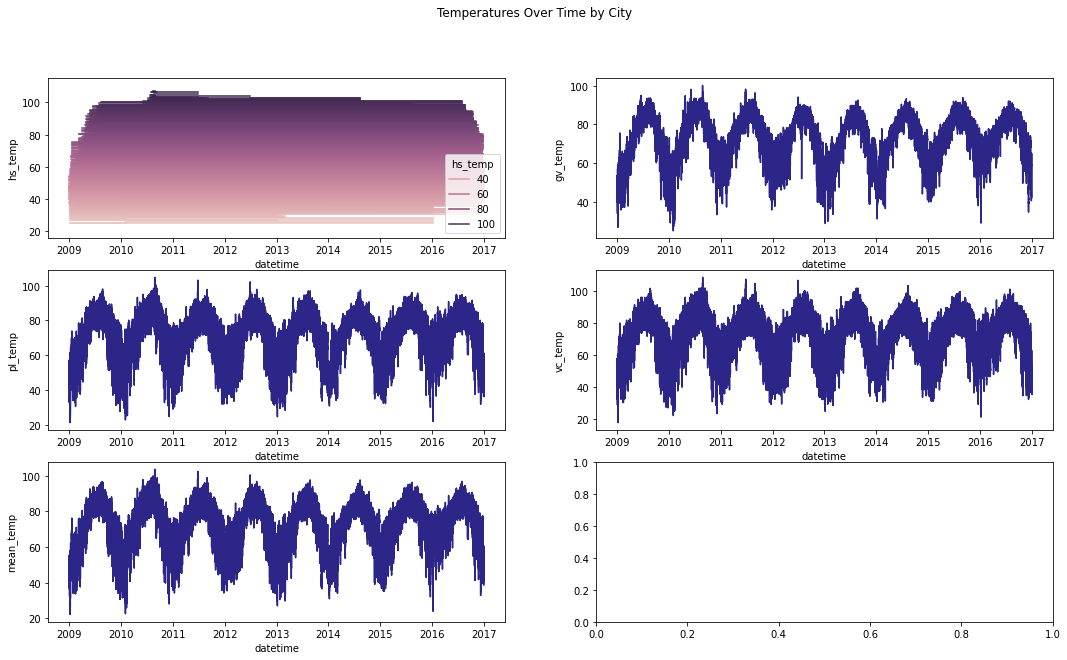

In [20]:
fig, axes = plt.subplots(3, 2, figsize=(18, 10))

fig.suptitle('Temperatures Over Time by City')

sns.lineplot(ax=axes[0, 0], data = train, x = 'datetime', y = 'hs_temp', hue = 'hs_temp')
sns.lineplot(ax=axes[0, 1], data = train, x = 'datetime', y = 'gv_temp')
sns.lineplot(ax=axes[1, 0], data = train, x = 'datetime', y = 'pl_temp')
sns.lineplot(ax=axes[1, 1], data = train, x = 'datetime', y = 'vc_temp')
sns.lineplot(ax=axes[2, 0], data = train, x = 'datetime', y = 'mean_temp');

#### Humidity:

In [12]:
#Creating a "mean_humidity" column to average the temperaturs across the cities:

train['mean_humidity'] = (train.hs_humidity + train.gv_humidity + train.pl_humidity + train.vc_humidity) / 4

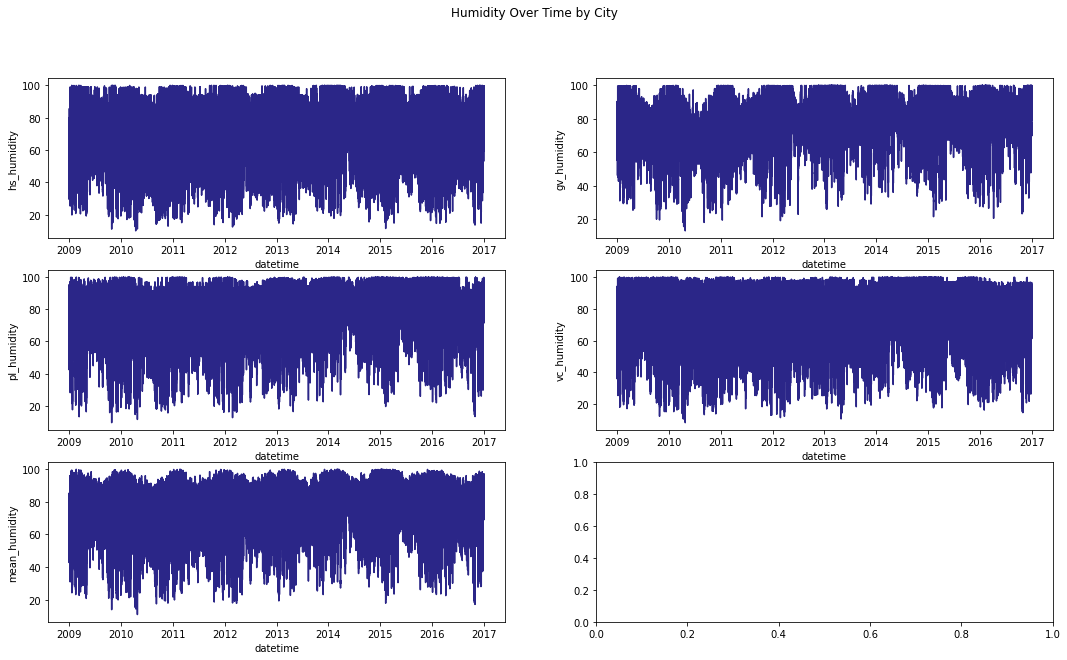

In [13]:
fig, axes = plt.subplots(3, 2, figsize=(18, 10))

fig.suptitle('Humidity Over Time by City')

sns.lineplot(ax=axes[0, 0], data = train, x = 'datetime', y = 'hs_humidity')
sns.lineplot(ax=axes[0, 1], data = train, x = 'datetime', y = 'gv_humidity')
sns.lineplot(ax=axes[1, 0], data = train, x = 'datetime', y = 'pl_humidity')
sns.lineplot(ax=axes[1, 1], data = train, x = 'datetime', y = 'vc_humidity')
sns.lineplot(ax=axes[2, 0], data = train, x = 'datetime', y = 'mean_humidity');

#### 'Feels Like':

In [18]:
#Creating a "mean_feelslike" column to average the temperaturs across the cities:

train['mean_feelslike'] = (train.hs_feelslike + train.gv_feelslike + train.pl_feelslike + train.vc_feelslike) / 4

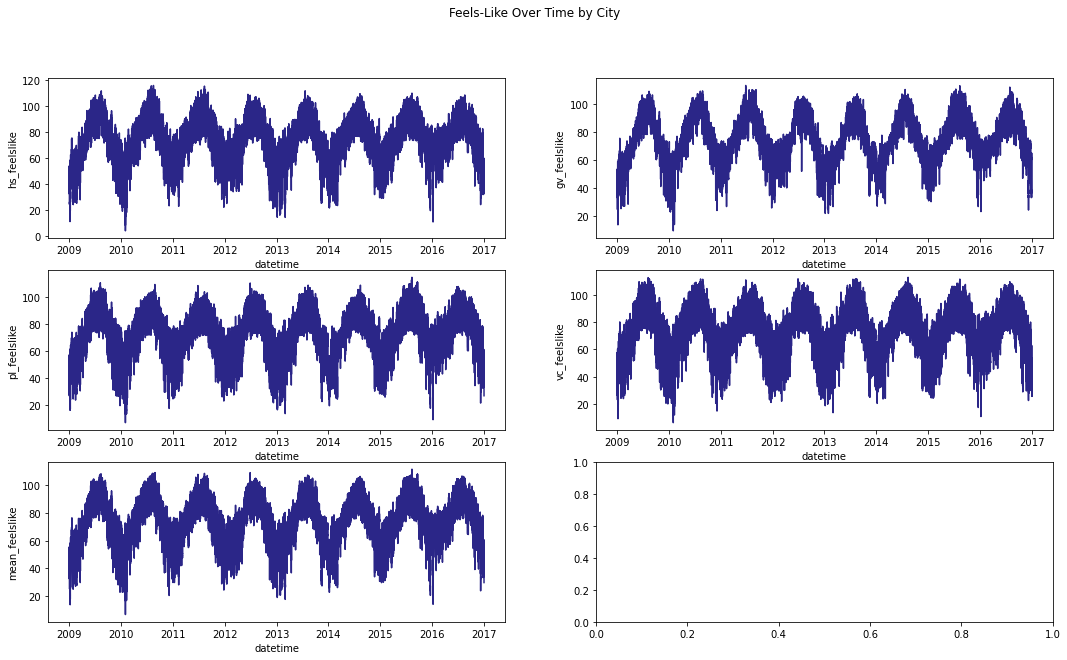

In [21]:
fig, axes = plt.subplots(3, 2, figsize=(18, 10))

fig.suptitle('Feels-Like Over Time by City')

sns.lineplot(ax=axes[0, 0], data = train, x = 'datetime', y = 'hs_feelslike')
sns.lineplot(ax=axes[0, 1], data = train, x = 'datetime', y = 'gv_feelslike')
sns.lineplot(ax=axes[1, 0], data = train, x = 'datetime', y = 'pl_feelslike')
sns.lineplot(ax=axes[1, 1], data = train, x = 'datetime', y = 'vc_feelslike')
sns.lineplot(ax=axes[2, 0], data = train, x = 'datetime', y = 'mean_feelslike');